# Part of Speech


## Requirements

- Download the libraries covered in the book NLTK.
- Download specific libraries,

In [0]:
import tarfile
import nltk
nltk.download() #1. d, 2. book, 3. q

nltk.download('treebank')

!pip3 install python-crfsuite
!pip install dill

# Lab Session 3

## Model: Hidden Markov Model (HMM)



In [75]:
%%time

# Training
from nltk.corpus import treebank
from nltk.tag.hmm import HiddenMarkovModelTrainer

train_data = treebank.tagged_sents()[:30]
test_data = treebank.tagged_sents()[3000:]

print(f'Training data set:\n {train_data[:4]}')
print(f'Test data set:\n {test_data[:4]}')

HMM = HiddenMarkovModelTrainer()
HMM = HMM.train_supervised(train_data)
print(f'Accuracy: {HMM.evaluate(test_data)}')

Training data set:
 [[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')], [('Mr.', 'NNP'), ('Vinken', 'NNP'), ('is', 'VBZ'), ('chairman', 'NN'), ('of', 'IN'), ('Elsevier', 'NNP'), ('N.V.', 'NNP'), (',', ','), ('the', 'DT'), ('Dutch', 'NNP'), ('publishing', 'VBG'), ('group', 'NN'), ('.', '.')], [('Rudolph', 'NNP'), ('Agnew', 'NNP'), (',', ','), ('55', 'CD'), ('years', 'NNS'), ('old', 'JJ'), ('and', 'CC'), ('former', 'JJ'), ('chairman', 'NN'), ('of', 'IN'), ('Consolidated', 'NNP'), ('Gold', 'NNP'), ('Fields', 'NNP'), ('PLC', 'NNP'), (',', ','), ('was', 'VBD'), ('named', 'VBN'), ('*-1', '-NONE-'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('of', 'IN'), ('this', 'DT'), ('British', 'JJ'), ('industrial', 'JJ'), ('conglomerate', 'NN'), ('.', '.')

In [11]:
%%time
# Predicting

test_tags = [tag for sent in test_data for (word, tag) in sent]
words_tags = [word for sent in test_data for (word, tag) in sent]
pred_tags = [t for (w, t) in HMM.tag(words_tags)]

print(f'Test tags:\n {test_tags[:10]}')
print(f'Predictions tags:\n {pred_tags[:10]}')


print(f' confusion matrix:\n {nltk.ConfusionMatrix(test_tags[:10], pred_tags[:10])}')

Test tags:
 ['IN', 'NNP', ',', 'DT', 'NNP', 'NN', 'IN', 'CD', 'VBN', 'NNS']
Predictions tags:
 ['NNP', 'NNP', 'NNP', 'NNP', 'NNP', 'NNP', 'NNP', 'NNP', 'NNP', 'NNP']
 confusion matrix:
     |           N N V |
    |   C D I N N N B |
    | , D T N N P S N |
----+-----------------+
  , |<.>. . . . 1 . . |
 CD | .<.>. . . 1 . . |
 DT | . .<.>. . 1 . . |
 IN | . . .<.>. 2 . . |
 NN | . . . .<.>1 . . |
NNP | . . . . .<2>. . |
NNS | . . . . . 1<.>. |
VBN | . . . . . 1 .<.>|
----+-----------------+
(row = reference; col = test)

CPU times: user 3.93 s, sys: 41.7 ms, total: 3.97 s
Wall time: 3.97 s


In [12]:
%%time
preds = HMM.tag(words_tags[:500])


CPU times: user 78.6 ms, sys: 6.12 ms, total: 84.7 ms
Wall time: 82.3 ms


## TnT - A Statisical Part of Speech Tagger 


In [70]:
%%time

# Training
from nltk.tag import tnt

TnT = tnt.TnT()
TnT.train(train_data)

print(f'Accuracy: {TnT.evaluate(test_data)}')

Accuracy: 0.4572415281674941
CPU times: user 643 ms, sys: 22 ms, total: 665 ms
Wall time: 669 ms


In [0]:
# Predicting

# pred_tags = [t for (w, t) in TnT.tag(words_tags)]

# print(f'Test tags:\n {test_tags[:10]}')
# print(f'Predictions tags:\n {pred_tags[:10]}')


# print(f' confusion matrix:\n {nltk.ConfusionMatrix(test_tags[:10], pred_tags[:10])}')

# it raises a recursion depth limit. It seems that the prediction time is 
# expensive when dealing with many values.

In [14]:
%%time
preds = TnT.tag(words_tags[:500])

CPU times: user 2.32 s, sys: 598 ms, total: 2.92 s
Wall time: 2.93 s


## Perceptron

In [47]:
%%time

# Training

from nltk.tag.perceptron import PerceptronTagger

PER = PerceptronTagger(load=False)
PER.train(train_data)

print(f'Accuracy: {PER.evaluate(test_data)}')

Accuracy: 0.9119792790848262
CPU times: user 4.12 s, sys: 45 ms, total: 4.16 s
Wall time: 4.17 s


In [16]:
%%time

# Predicting

pred_tags = [t for (w, t) in PER.tag(words_tags)]

print(f'Test tags:\n {test_tags[:10]}')
print(f'Predictions tags:\n {pred_tags[:10]}')


print(f' confusion matrix:\n {nltk.ConfusionMatrix(test_tags[:10], pred_tags[:10])}')

# it raises a recursion depth limit. It seems that the prediction time is 
# expensive when dealing with many values.

Test tags:
 ['IN', 'NNP', ',', 'DT', 'NNP', 'NN', 'IN', 'CD', 'VBN', 'NNS']
Predictions tags:
 ['IN', 'NNP', ',', 'DT', 'NNP', 'NN', 'IN', 'CD', 'NNS', 'NN']
 confusion matrix:
     |           N N V |
    |   C D I N N N B |
    | , D T N N P S N |
----+-----------------+
  , |<1>. . . . . . . |
 CD | .<1>. . . . . . |
 DT | . .<1>. . . . . |
 IN | . . .<2>. . . . |
 NN | . . . .<1>. . . |
NNP | . . . . .<2>. . |
NNS | . . . . 1 .<.>. |
VBN | . . . . . . 1<.>|
----+-----------------+
(row = reference; col = test)

CPU times: user 835 ms, sys: 0 ns, total: 835 ms
Wall time: 837 ms


## CRF

In [17]:
%%time

# Training

import pycrfsuite as pycrfsuite
from nltk.tag import CRFTagger


CRF = CRFTagger()
CRF.train(train_data,'model.crf.tagger')


print(f'Accuracy: {CRF.evaluate(test_data)}')

Accuracy: 0.6848694150658321
CPU times: user 750 ms, sys: 24.1 ms, total: 774 ms
Wall time: 777 ms


In [18]:
%%time

# Predicting

pred_tags = [t for (w, t) in CRF.tag(words_tags)]

print(f'Test tags:\n {test_tags[:10]}')
print(f'Predictions tags:\n {pred_tags[:10]}')


print(f' confusion matrix:\n {nltk.ConfusionMatrix(test_tags[:10], pred_tags[:10])}')

Test tags:
 ['IN', 'NNP', ',', 'DT', 'NNP', 'NN', 'IN', 'CD', 'VBN', 'NNS']
Predictions tags:
 ['NNP', 'NNP', ',', 'DT', 'NNP', 'NN', 'IN', 'CD', 'VBN', 'NNS']
 confusion matrix:
     |           N N V |
    |   C D I N N N B |
    | , D T N N P S N |
----+-----------------+
  , |<1>. . . . . . . |
 CD | .<1>. . . . . . |
 DT | . .<1>. . . . . |
 IN | . . .<1>. 1 . . |
 NN | . . . .<1>. . . |
NNP | . . . . .<2>. . |
NNS | . . . . . .<1>. |
VBN | . . . . . . .<1>|
----+-----------------+
(row = reference; col = test)

CPU times: user 206 ms, sys: 3.09 ms, total: 209 ms
Wall time: 214 ms


In [24]:
# Loading the saved model
!ls
CRF.set_model_file("model.crf.tagger")


model.crf.tagger  sample_data


# Exercise

Statement:

1. Consider Treebank corpus.

  - Train HMM, TnT, perceptron and CRF models using the first 500, 1000, 1500, 2000, 2500 and 3000 sentences.

  - Evaluate the resulting 24 models using sentences from 3001.

2. Provide a figure with four learning curves, each per model type (X=training set size; Y=accuracy).

  - Which model would you select? Justify the answer.
  
Upload the jupyter file of the exercise to the Raco.


Name: HMM | Accuracy : 0.10058277573926182 |           Size : 10 | Time: 4.2814860343933105
Name: HMM | Accuracy : 0.1030002158428664 |           Size : 20 | Time: 4.569280624389648
Name: HMM | Accuracy : 0.10628102741204404 |           Size : 30 | Time: 4.819671154022217
Name: HMM | Accuracy : 0.10843945607597669 |           Size : 40 | Time: 4.699190855026245
Name: HMM | Accuracy : 0.10895747895532053 |           Size : 50 | Time: 4.8138957023620605
Name: TnT | Accuracy : 0.3731059788473991 |           Size : 10 | Time: 0.5922703742980957
Name: TnT | Accuracy : 0.4268076840060436 |           Size : 20 | Time: 0.6035077571868896
Name: TnT | Accuracy : 0.4572415281674941 |           Size : 30 | Time: 0.6562485694885254
Name: TnT | Accuracy : 0.48525793222533997 |           Size : 40 | Time: 0.6690435409545898
Name: TnT | Accuracy : 0.5201813080077703 |           Size : 50 | Time: 0.6735415458679199
Name: PER | Accuracy : 0.5054608245197496 |           Size : 10 | Time: 1.44241309165954

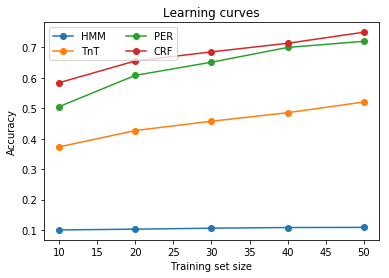

In [136]:
import matplotlib.pyplot as plt
import time

from nltk.corpus import treebank
from nltk.tag.hmm import HiddenMarkovModelTrainer
from nltk.tag.tnt import TnT
from nltk.tag.perceptron import PerceptronTagger
from nltk.tag import CRFTagger

# HMM = HiddenMarkovModelTrainer()
# TnT = TnT()
# PER = PerceptronTagger(load=False)
# CRF = CRFTagger()

n_sentences = [500, 1000, 1500, 2000, 2500, 3000]
n_sentences = [10, 20, 30, 40, 50]

def run_hmm(train_data, test_data):
  hmm = HiddenMarkovModelTrainer()
  hmm = hmm.train_supervised(train_data)
  return hmm.evaluate(test_data)

def run_tnt(train_data, test_data):
  tnt = TnT()
  tnt.train(train_data)
  return tnt.evaluate(test_data)

def run_per(train_data, test_data):
  per = PerceptronTagger(load=False)
  per.train(train_data)
  return per.evaluate(test_data)

def run_crf(train_data, test_data):
  crf = CRFTagger()
  crf.train(train_data, "model.crf.tagger")
  return crf.evaluate(test_data)

# models = {'HMM': lambda t: HiddenMarkovModelTrainer().train_supervised(t),
#           'TnT': lambda t: TnT().train(t),
#           'PER': lambda t: PerceptronTagger(load=False).train(t),
#           'CRF': lambda t: CRFTagger().train(t,'model.crf.tagger')}
models = {'HMM': run_hmm,
          'TnT': run_tnt,
          'PER': run_per,
          'CRF': run_crf}

results = {'HMM': {'x':[], 'y':[], 'time':[]},
           'TnT': {'x':[], 'y':[], 'time':[]},
           'PER': {'x':[], 'y':[], 'time':[]},
           'CRF': {'x':[], 'y':[], 'time':[]}}

total_data = treebank.tagged_sents()


for name, model in models.items():
  
  for n_sents in n_sentences:
    train_data = total_data[:n_sents]
    test_data = total_data[3000:]
    start = time.time()
    acc = model(train_data, test_data)
    end = time.time()

    results[name]['x'].append(n_sents)
    results[name]['y'].append(acc)
    results[name]['time'].append(end - start)

    print(f'Name: {name} | Acc: {acc:.3f} | Size : {n_sents} | Time: {(end - start):.3f}s')


In [155]:
results['HMM']['time']
# results.items()

[4.2814860343933105,
 4.569280624389648,
 4.819671154022217,
 4.699190855026245,
 4.8138957023620605]

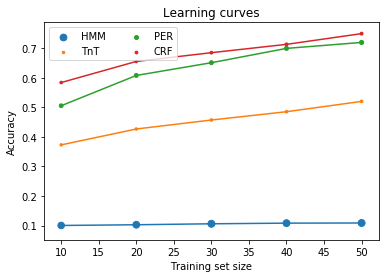

In [162]:
for name, axis in results.items():
  # [plt.plot(x, y, marker='o', markersize=y*10, label=name) for (x,y,t) in zip(axis['x'], axis['y'], axis['time'])]
  plt.scatter(axis['x'], axis['y'], s=[t*10 for t in axis['time']], label=name)
  plt.plot(axis['x'], axis['y'])

plt.title('Learning curves')
plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.legend(loc='best', frameon=True, ncol=2)
plt.show()

In [48]:
model.evaluate(test_data)

AttributeError: ignored

In [37]:
hmm = HiddenMarkovModelTrainer()
hmm = hmm.train(train_data)
print(f'Accuracy: {hmm.evaluate(test_data)}')

Accuracy: 0.10628102741204404


In [36]:
hmm = HiddenMarkovModelTrainer()
hmm = hmm.train_supervised(train_data)
print(f'Accuracy: {hmm.evaluate(test_data)}')

Accuracy: 0.10628102741204404


In [40]:
TnT.train()

nltk.tag.tnt.TnT